In [98]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [99]:
df = pd.read_csv("ToyotaCorolla.csv")
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [100]:
x = df.drop(columns = ['Id', 'Model', 'Price', 'Mfg_Month', 'Mfg_Year',
                      'Met_Color','Color','CC',
                       'Cylinders', 'Gears', 'Weight',
                       'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
                        'Boardcomputer',
                       'Central_Lock', 'Power_Steering', 'Radio',
                       'Mistlamps', 'Backseat_Divider', 'Metallic_Rim',
                       'Radio_cassette', 'Parking_Assistant'])
y = df.drop(columns = ['Id', 'Model', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
                       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
                       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
                       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
                       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
                       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
                       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
                       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'])
x

,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,23,46986,Diesel,90,0,3,210,0,3,0,0,0,1,0,0
1,23,72937,Diesel,90,0,3,210,0,3,1,0,1,0,0,0
2,24,41711,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
3,26,48000,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
4,30,38500,Diesel,90,0,3,210,1,3,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,3,69,1,3,1,0,0,1,1,0
1432,72,19000,Petrol,86,0,3,69,0,3,0,0,0,0,1,0
1433,71,17016,Petrol,86,0,3,69,0,3,0,0,0,0,0,0
1434,70,16916,Petrol,86,0,3,69,1,3,0,0,0,0,0,0


In [101]:
x_fueldums = x['Fuel_Type'].str.get_dummies()
x = x.drop(columns = ['Fuel_Type'])

In [102]:
x = pd.concat([x,x_fueldums], axis = 1)
x.head()

,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,CNG,Diesel,Petrol
0,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,0,1,0
1,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,0,1,0
2,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,0,1,0
3,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,0,1,0
4,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,0,1,0


In [103]:
train_x, test_x,train_y,test_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [104]:
from sklearn.tree import DecisionTreeRegressor
model_1 = DecisionTreeRegressor(max_depth=30)
clf = model_1.fit(train_x, train_y)



In [105]:
predict_1 = clf.predict(test_x)
train_pred = clf.predict(train_x)

In [106]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 32.50
|   |--- feature_2 <= 113.00
|   |   |--- feature_0 <= 21.00
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- feature_1 <= 20052.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- value: [23750.00]
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- feature_4 <= 4.50
|   |   |   |   |   |   |   |--- feature_0 <= 14.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 9.00
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [17900.00]
|   |   |   |   |   |   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [17795.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  9.00
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 77.00
|   |   |   |   |   |   |   |   |   |   |--- value: [18800.00]
|   |   |   |   |   |   |   |   |   |--- feature_5 >  77.00
|   |   |   |   |   |   |   |   |   |   |--- value: [18500.00]
|  

<Figure size 3600x1440 with 0 Axes>

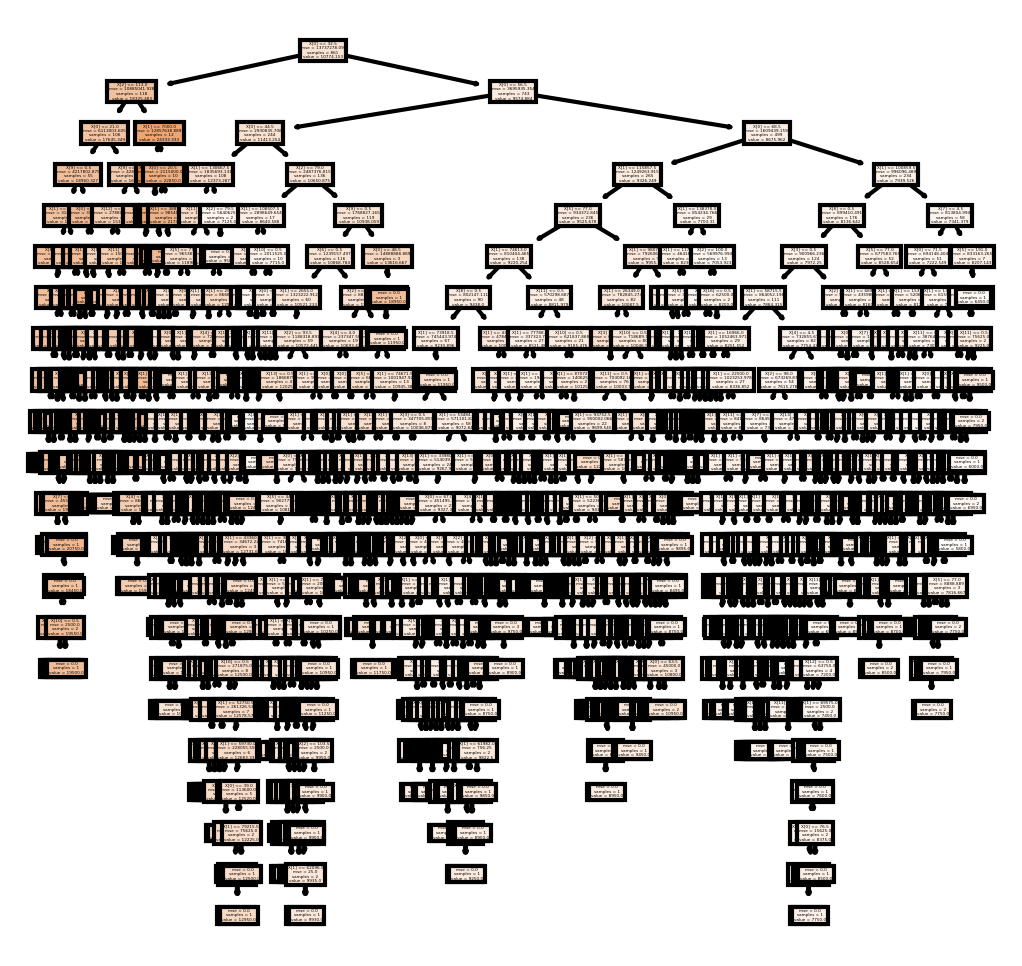

In [107]:
#tree.plot_tree(clf)
plt.figure(figsize = (50,20))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,filled = True)
fig.savefig('imagename.png')

Feature: 0, Score: 0.83495
Feature: 1, Score: 0.06018
Feature: 2, Score: 0.05224
Feature: 3, Score: 0.00127
Feature: 4, Score: 0.00463
Feature: 5, Score: 0.00651
Feature: 6, Score: 0.00379
Feature: 7, Score: 0.00240
Feature: 8, Score: 0.00435
Feature: 9, Score: 0.01335
Feature: 10, Score: 0.00206
Feature: 11, Score: 0.00497
Feature: 12, Score: 0.00439
Feature: 13, Score: 0.00254
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00178
Feature: 16, Score: 0.00056


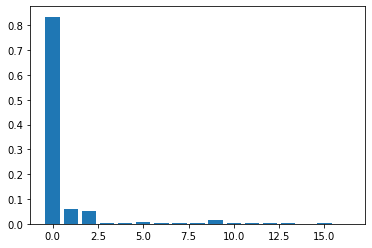

In [108]:
importance = model_1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error
rms_error_test = mean_squared_error(test_y, predict_1, squared=False)
print(rms_error_test)
rms_error_train = mean_squared_error(train_y, train_pred, squared=False)
print(rms_error_train)

1471.0348791419508
0.0


In [117]:
from sklearn.model_selection import GridSearchCV
gridclf = GridSearchCV(DecisionTreeRegressor(), cv=5)
gridclf.fit(train_x, train_y)
print(gridclf.fit.best_params_)


TypeError: __init__() missing 1 required positional argument: 'param_grid'